In [10]:
from matplotlib import cm, pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import Utilities as U
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:


X,y=U.load_dataset(.5)


c:\Users\schio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
c:\Users\schio\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [20]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [21]:
from sklearn.model_selection import cross_val_score


def tune_parameter(parname, parvalues ,cf ,k_fold,X,y):
    acc=[]
    for i in range(len(parvalues)):
        cf.set_params(**{parname:parvalues[i]})
        acc.append(cross_val_score(cf, X, y, cv=k_fold))
    return acc

In [78]:
from numpy import arange

cl=RandomForestClassifier(n_estimators=100)
t_values=[.001,.0005,.00025,.0001,.00005]
print(t_values)
t_acc=tune_parameter("min_impurity_decrease",t_values,cl,10,X_train,y_train)

[0.001, 0.0005, 0.00025, 0.0001, 5e-05]


In [82]:
from numpy import mean


print(mean(t_acc,axis=1))
t_accp=mean(t_acc,axis=1)

[0.91314286 0.93178571 0.94510714 0.95492857 0.96014286]


([<matplotlib.axis.XTick at 0x2486e241510>,
 [Text(0, 0, '0.001'),
  Text(1, 0, '0.0005'),
  Text(2, 0, '0.00025'),
  Text(3, 0, '0.0001'),
  Text(4, 0, '5e-05')])

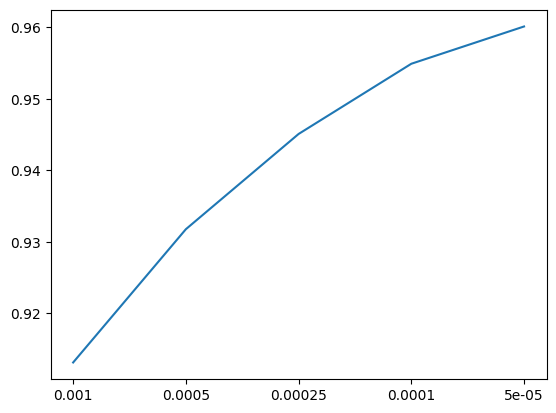

In [83]:

fig, ax = plt.subplots()
x_place=arange(len(t_accp))
ax.plot(t_accp)

plt.xticks(x_place, t_values)



In [85]:
cl=RandomForestClassifier(n_estimators=100,min_impurity_decrease=0.0001)
cl.fit(X_train,y_train)

clBase=RandomForestClassifier(n_estimators=100)
clBase.fit(X_train,y_train)


RandomForestClassifier()

In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,cl.predict(X_test)))
print(accuracy_score(y_test,clBase.predict(X_test)))

0.9537142857142857
0.959


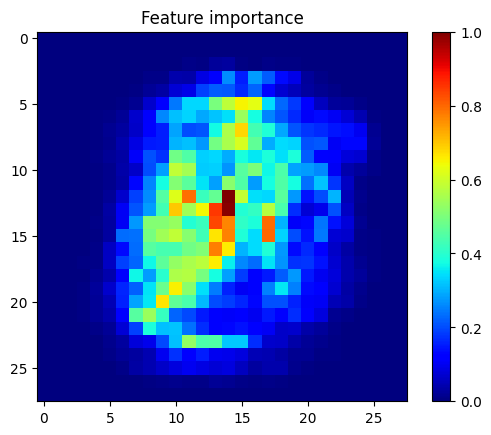

In [94]:

fi=cl.feature_importances_
data=(fi/max(fi)).reshape(28,28)
fig, ax = plt.subplots()
l=ax.imshow(data, cmap=cm.jet, interpolation='nearest')
ax.set_title("Feature importance")
fig.colorbar(l,ax=ax)


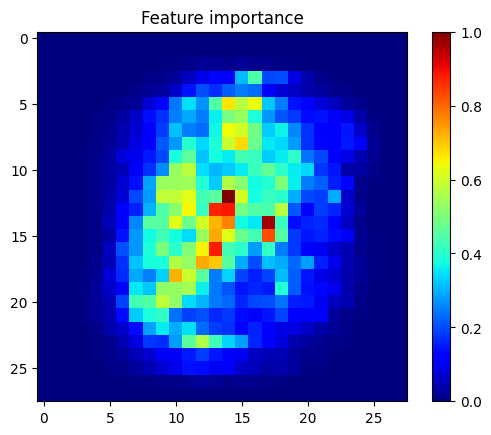

In [95]:
fi=clBase.feature_importances_
data=(fi/max(fi)).reshape(28,28)
fig, ax = plt.subplots()
l=ax.imshow(data, cmap=cm.jet, interpolation='nearest')
ax.set_title("Feature importance")
fig.colorbar(l,ax=ax)